In [51]:
import pandas as pd
import matplotlib.pyplot as plt

Load and prepare data

In [53]:
df = pd.read_csv('./data/training_data.csv')
df = df.dropna(subset=['Genre', 'Type', 'Date']) # removes rows with missing values
df['Date'] = pd.to_numeric(df['Date'], errors='coerce') # converts to numeric values

Count frequencies per category 

In [55]:
Genre = df['Genre'].value_counts()
Type = df['Type'].value_counts()
Location = df['Location'].value_counts()
Date = df['Date'].value_counts()
Author = df['Author'].value_counts()

In [57]:
print(Genre.head())

Genre
Prose     10036
Poetry     5546
Drama      1590
Music       887
Name: count, dtype: int64


In [59]:
print(Type.head())

Type
story    4675
poet     3209
novel    3132
tale     1418
verse    1008
Name: count, dtype: int64


In [61]:
print(Location.head())

Location
London       12584
Edinburgh      685
New-York       384
Boston         231
Dublin         220
Name: count, dtype: int64


In [63]:
print(Date.head())

Date
1897.0    658
1896.0    635
1895.0    533
1893.0    497
1894.0    494
Name: count, dtype: int64


In [65]:
print(Author.head())

Author
Byron, George Gordon Byron    85
Scott, Walter                 58
Wood, Henry, Mrs              53
Oliphant, Mrs., Margaret      52
Pindar, Peter                 48
Name: count, dtype: int64


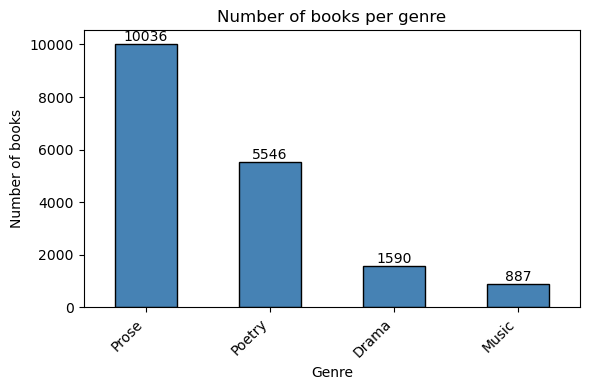

In [67]:
genre_counts = df['Genre'].value_counts()
fig, ax = plt.subplots(figsize=(6,4))
genre_counts.plot(
    kind='bar',
    ax=ax,
    color='steelblue',
    edgecolor='black'
)
ax.set_title('Number of books per genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of books')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )
plt.tight_layout()
plt.show()

Number of books per type

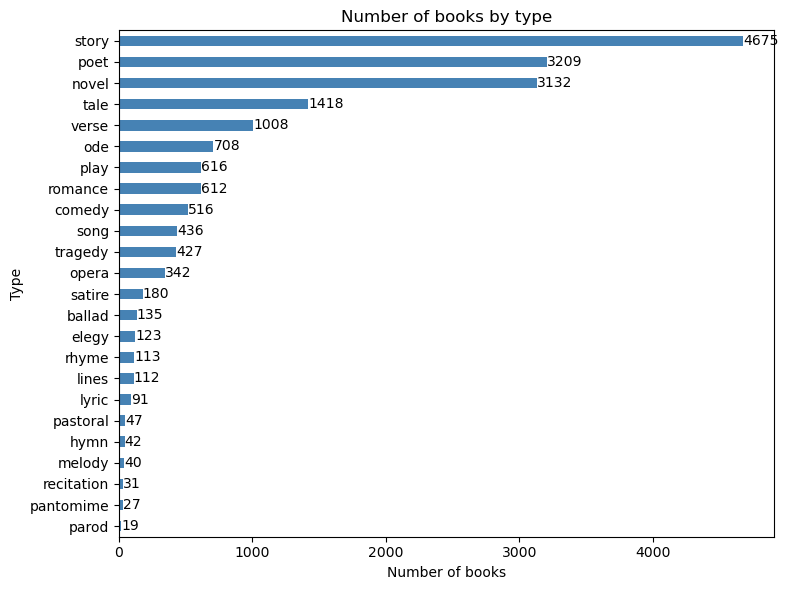

In [69]:
type_counts = df['Type'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
type_counts.plot(
    kind='barh',
    ax=ax,
    color='steelblue'
)
ax.set_title('Number of books by type')
ax.set_xlabel('Number of books')
ax.set_ylabel('Type')
ax.invert_yaxis()
for p in ax.patches:
    ax.annotate(
        int(p.get_width()),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center'
    )
plt.tight_layout()
plt.show()

Types distribution per genre

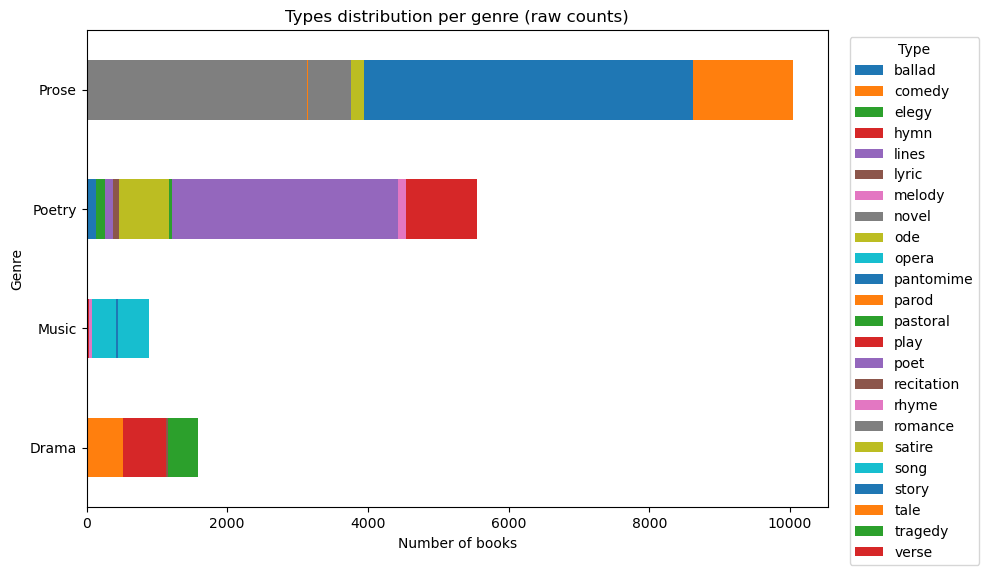

In [71]:
genre_type = pd.crosstab(df['Genre'], df['Type'])
fig, ax = plt.subplots(figsize=(10,6))
genre_type.plot(
    kind='barh',
    stacked=True,
    ax=ax
)
ax.set_title('Types distribution per genre (raw counts)')
ax.set_xlabel('Number of books')
ax.set_ylabel('Genre')
ax.legend(
    title='Type',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

Number of books per decade

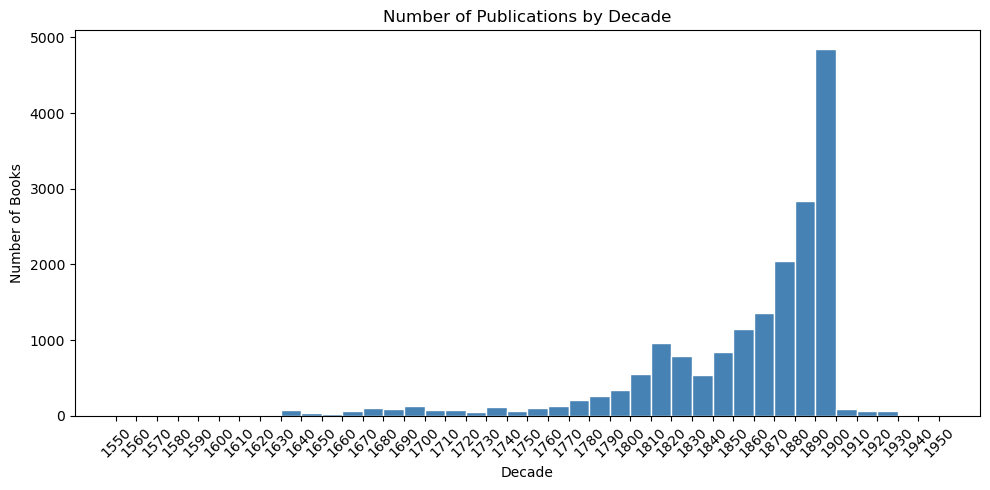

In [73]:
df['Decade'] = (df['Date'] // 10) * 10 # creates decade column

fig, ax = plt.subplots(figsize=(10, 5))
decade_bins = range(start_year, end_year, 10)
df['Decade'].plot(
    kind='hist',
    bins=decade_bins, 
    edgecolor='white',
    color='steelblue',
    ax=ax
)

ax.set_xticks(decade_bins)
ax.set_title('Number of Publications by Decade')
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Books')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()